# 💻📉 Logistic Regression for Customer Churn Prediction

### Design a machine learning algorithm , which will predict an employee will churn or not based on various predictors


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Load the dataset and  Display the first few rows of the dataset

In [69]:
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
churn_data.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
# checking various types of value in Categorical features for encoding.

In [71]:
churn_data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [21]:
# Quiz Can you write code to check how many different values stored in Contract (column)feature

In [72]:
churn_data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [22]:
churn_data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [23]:
churn_data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [24]:
churn_data['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

### Data Cleaning and Preparation

In [73]:
churn_data.shape

(7043, 9)

In [74]:
churn_data.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
# Quiz : What is your observation

In [75]:
 churn_data.select_dtypes(include=['object']).columns

Index(['customerID', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Encode categorical variables

In [77]:
churn_data.dtypes

customerID           object
tenure                int64
PhoneService          int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [76]:

label_encoders = {}
for column in churn_data.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        label_encoders[column] = LabelEncoder()
        churn_data[column] = label_encoders[column].fit_transform(churn_data[column])


In [34]:
# Encoding categorical variables (non-numeric columns) using Label Encoding
# - `fit_transform()` does two things:
#   1. `fit()`: Learns the unique categories in the column (e.g., "Yes"/"No" → 0/1)
#   2. `transform()`: Converts the text categories into numerical labels
# - We skip 'customerID' since it's just an identifier and not useful for modeling

### Purpose of the Code
### The purpose of this code is to encode categorical variables in the churn_data DataFrame into numerical 
### values. This is often necessary because many machine learning algorithms require numerical input and cannot   handle categorical data directly.

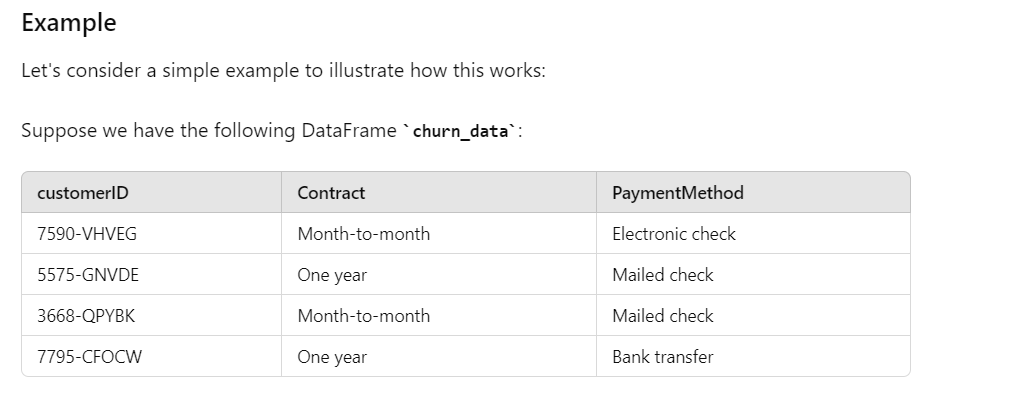

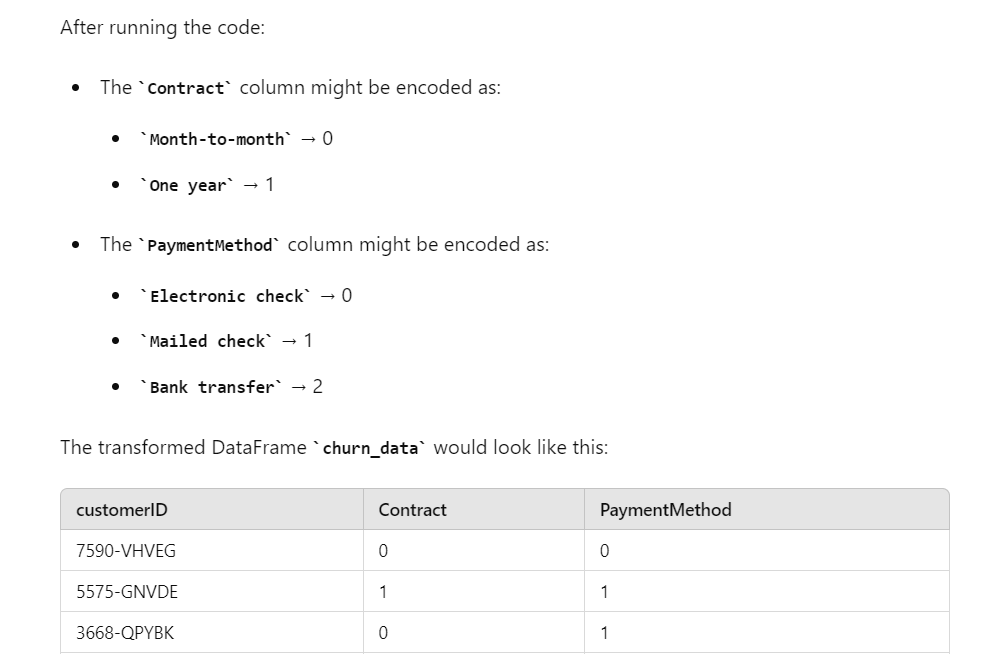

In [78]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,1,2,29.85,2505,0
1,5575-GNVDE,34,1,1,0,3,56.95,1466,0
2,3668-QPYBK,2,1,0,1,3,53.85,157,1
3,7795-CFOCW,45,0,1,0,0,42.30,1400,0
4,9237-HQITU,2,1,0,1,2,70.70,925,1


### Define the independent and dependent variables

In [79]:

X = churn_data.drop(columns=['customerID', 'Churn'])
y = churn_data['Churn']
X.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,1,2,29.85,2505
1,34,1,1,0,3,56.95,1466
2,2,1,0,1,3,53.85,157
3,45,0,1,0,0,42.30,1400
4,2,1,0,1,2,70.70,925


In [80]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

### Split the data into training and test sets

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
X_test.shape

(1409, 7)

In [83]:
y_test.shape

(1409,)

In [84]:
y_train.shape

(5634,)

In [85]:
X_train.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,21,1,1,0,3,64.85,610
1623,54,1,2,1,0,97.20,4319
6074,1,0,0,1,2,23.45,1940
1362,4,1,0,1,2,70.20,2012
6754,0,1,2,1,0,61.90,0


In [44]:
y_train.head()

2142    0
1623    0
6074    1
1362    1
6754    0
Name: Churn, dtype: int32

### Standardize the features

In [86]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [49]:
X_train

array([[-4.65683364e-01,  3.29573443e-01,  3.72908354e-01, ...,
         1.33926673e+00, -4.73723375e-04, -1.40800618e+00],
       [ 8.85536787e-01,  3.29573443e-01,  1.57759050e+00, ...,
        -1.47094882e+00,  1.07475386e+00,  5.58360318e-01],
       [-1.28460467e+00, -3.03422506e+00, -8.31773795e-01, ...,
         4.02528212e-01, -1.37649913e+00, -7.02892284e-01],
       ...,
       [-8.34197950e-01,  3.29573443e-01, -8.31773795e-01, ...,
         4.02528212e-01, -1.45294499e+00, -3.21706651e-01],
       [-8.34197950e-01,  3.29573443e-01, -8.31773795e-01, ...,
         4.02528212e-01,  1.14953785e+00, -1.53524478e+00],
       [-2.60953038e-01,  3.29573443e-01,  3.72908354e-01, ...,
        -5.34210304e-01, -1.49781538e+00,  3.30921324e-01]])

In [50]:
y_train

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5634, dtype: int32

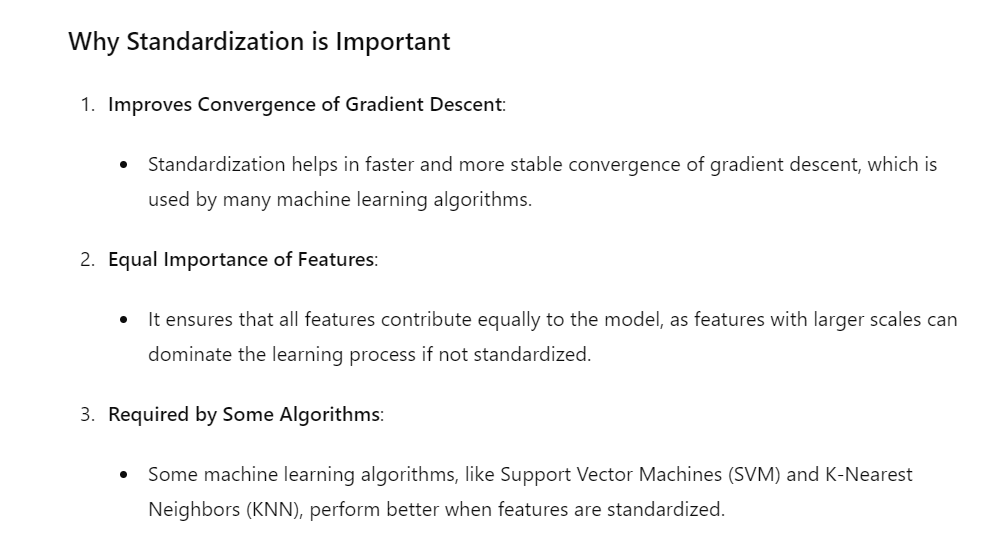

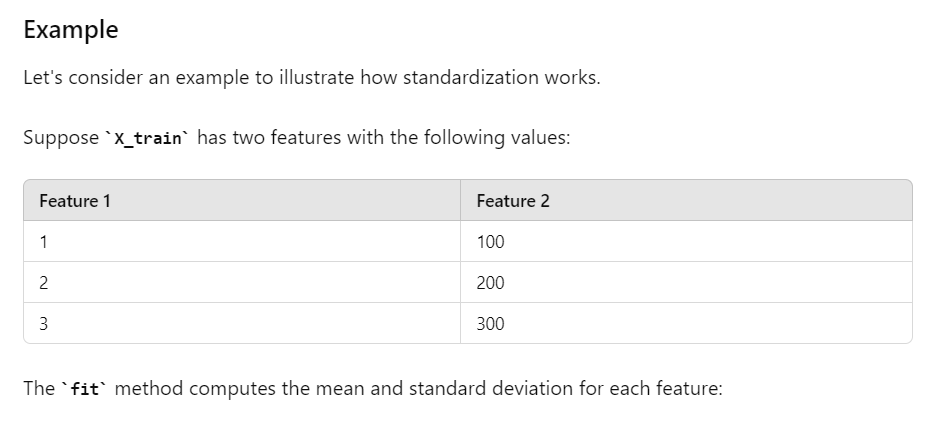

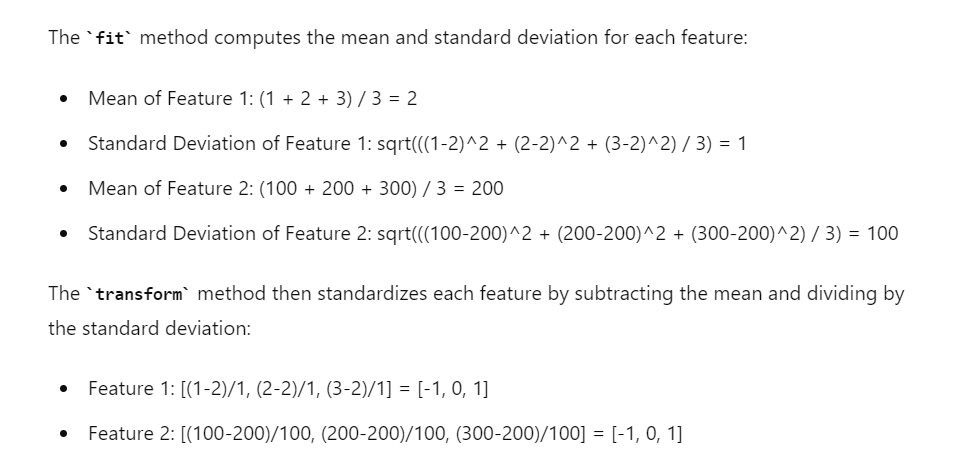

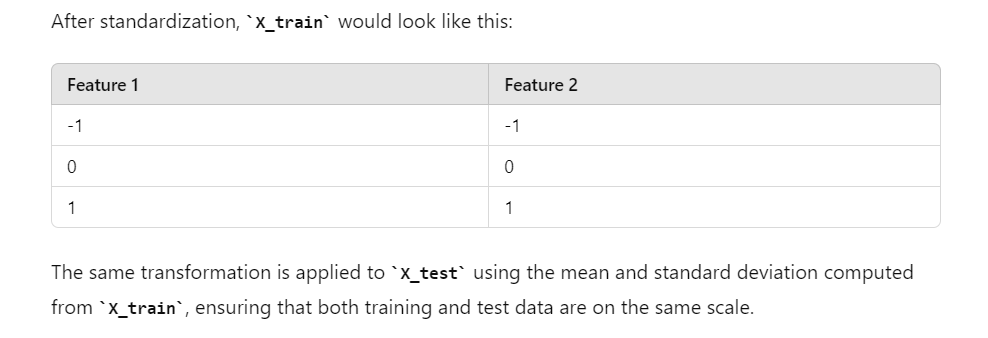

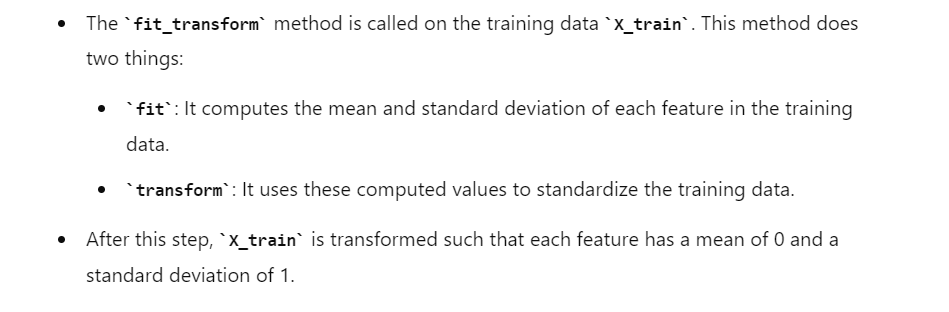

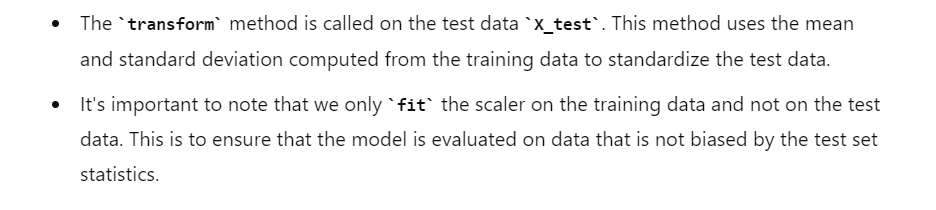

In [87]:
X_train

array([[-4.65683364e-01,  3.29573443e-01,  3.72908354e-01, ...,
         1.33926673e+00, -4.73723375e-04, -1.40800618e+00],
       [ 8.85536787e-01,  3.29573443e-01,  1.57759050e+00, ...,
        -1.47094882e+00,  1.07475386e+00,  5.58360318e-01],
       [-1.28460467e+00, -3.03422506e+00, -8.31773795e-01, ...,
         4.02528212e-01, -1.37649913e+00, -7.02892284e-01],
       ...,
       [-8.34197950e-01,  3.29573443e-01, -8.31773795e-01, ...,
         4.02528212e-01, -1.45294499e+00, -3.21706651e-01],
       [-8.34197950e-01,  3.29573443e-01, -8.31773795e-01, ...,
         4.02528212e-01,  1.14953785e+00, -1.53524478e+00],
       [-2.60953038e-01,  3.29573443e-01,  3.72908354e-01, ...,
        -5.34210304e-01, -1.49781538e+00,  3.30921324e-01]])

###  Building your First Logistic Regression Model

In [88]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [89]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [53]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int32

### Feature Selection using RFE (Recursive Feature Elimination)
### - Goal: Automatically select top 5 most important features to improve model performance.
### - How it works: RFE recursively removes the least important features and trains the model.
### - Why use it?: Reduces overfitting, speeds up training, and simplifies interpretation.


### - It is a feature selection technique that recursively removes the least

### important features and builds a model using the remaining attributes.


In [90]:
from sklearn.feature_selection import RFE

# Initialize the model for RFE
rfe_model = LogisticRegression()

# Initialize RFE with the model
rfe = RFE(estimator=rfe_model, n_features_to_select=5)


# Why 5 features? Rule of thumb: Start with sqrt(total_features) or use cross-validation.
# Here, we pick 5 for demonstration—adjust based on model performance!



In [92]:
# Fit RFE
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = rfe.support_

# Transform the datasets
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Retrain the model on the selected features
model.fit(X_train_rfe, y_train)

# Make predictions
y_pred_rfe = model.predict(X_test_rfe)


##  Model Evaluation Metrics - Exercise

### Various Model evaluation techniques

###  Confusion Matrix and Accuracy

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfe)

print("Confusion Matrix:\n", conf_matrix)



Confusion Matrix:
 [[937  99]
 [170 203]]


In [94]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rfe)
print("Accuracy: ", accuracy)


Accuracy:  0.8090844570617459


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Confusion Matrix:
 [[938  98]
 [174 199]]
Accuracy:  0.8069552874378992


###  Metrics Beyond Accuracy: Sensitivity & Specificity

In [95]:
# Calculate sensitivity (recall) and specificity
from sklearn.metrics import recall_score

# Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred_rfe)
print("Sensitivity: ", sensitivity)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rfe).ravel()
specificity = tn / (tn + fp)
print("Specificity: ", specificity)


Sensitivity:  0.5442359249329759
Specificity:  0.9044401544401545


In [96]:
# Calculate sensitivity (recall) and specificity
from sklearn.metrics import recall_score

# Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred)
print("Sensitivity: ", sensitivity)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


Sensitivity:  0.5335120643431636
Specificity:  0.9054054054054054


In [100]:
print(tn,fp,fn,tp)

938 98 174 199


In [ ]:

specificity = tn / (tn + fp)

print("Specificity: ", specificity)


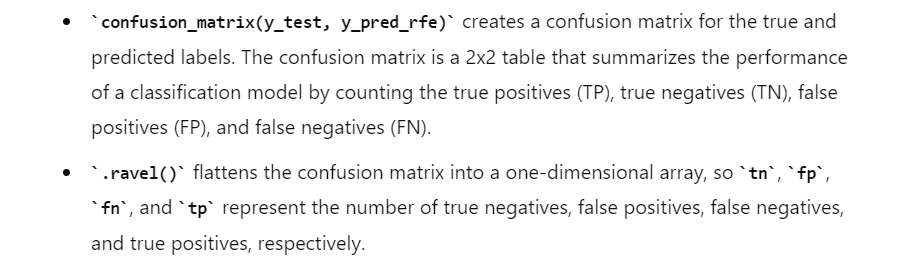


###  ROC Curve

### - Shows how well your model distinguishes between classes (e.g., Churn vs No Churn).

### - Perfect model: Top-left corner (AUC=1.0).

### - Random guess: Diagonal line (AUC=0.5).

### - Higher AUC = Better performance.

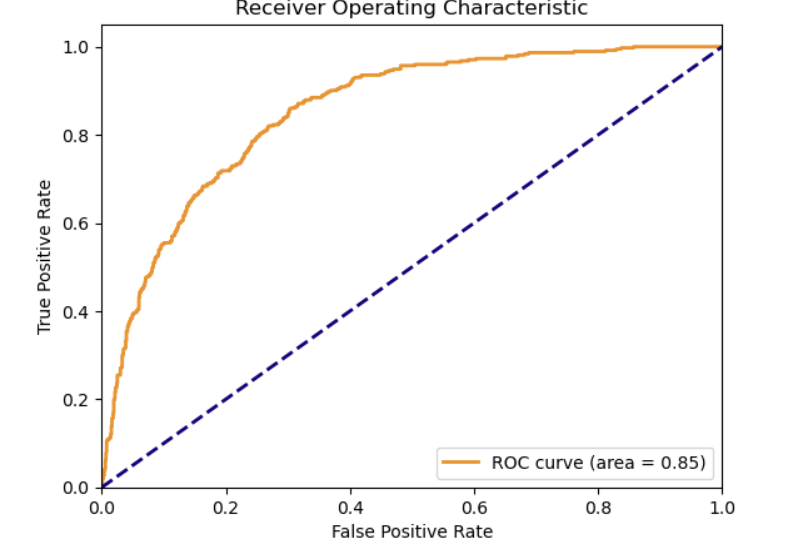

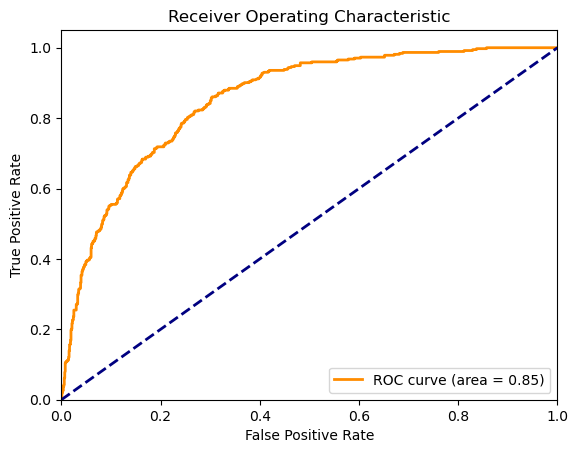

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_rfe)[:, 1])

# Plot ROC curve
plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, model.predict_proba(X_test_rfe)[:, 1]))




# Plotting the ROC (Receiver Operating Characteristic) Curve:
# - `fpr` (x-axis): False Positive Rate (1 - Specificity)
# - `tpr` (y-axis): True Positive Rate (Sensitivity/Recall)
# - `color='darkorange'`: Curve color (standard for visibility)
# - `lw=2`: Line width for better visibility
# - `label`: Shows AUC (Area Under Curve) score (0.5 = random, 1.0 = perfect)
# - `roc_auc_score()` calculates the AUC to quantify model performance (higher = better)




plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


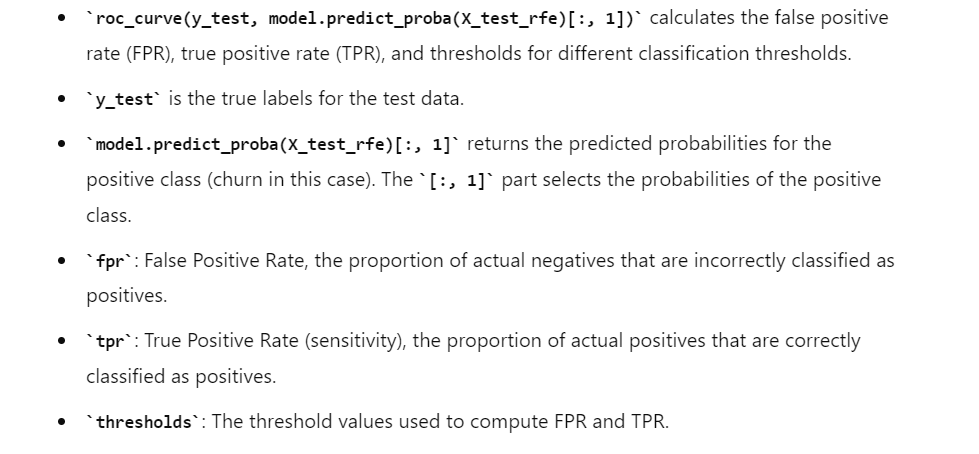

### Calculate precision and recall

In [102]:

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_rfe)
recall = recall_score(y_test, y_pred_rfe)

print("Precision: ", precision)
print("Recall: ", recall)


Precision:  0.6721854304635762
Recall:  0.5442359249329759


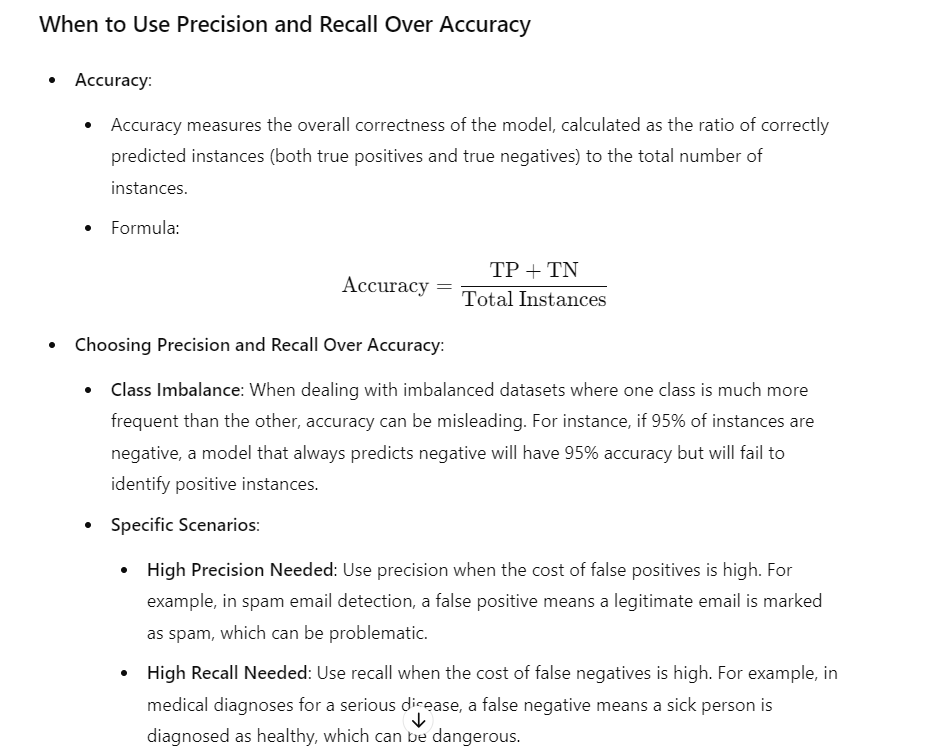